<a href="https://colab.research.google.com/github/joseluis-hd/Analisis-de-Algoritmos/blob/main/umap_convex_hulll.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install anndata

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.0/129.0 kB 2.6 MB/s eta 0:00:00


In [ ]:
pip install scanpy

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 1.4 MB/s eta 0:00:00
  Created wheel for session-info: filename=session_info-1.0.0-py3-none-any.whl size=8023 sha256=ef062890e119a4598658d7d5232d18048e0750be6eddbcab65a9b0e92eb277a4
  Stored in directory: /root/.cache/pip/wheels/6a/aa/b9/eb5d4031476ec10802795b97ccf937b9bd998d68a9b268765a
Successfully built session-info


[[ 1.8232564 -9.120095 ]
 [ 1.652221  -9.106577 ]
 [ 1.8172761 -9.226767 ]
 ...
 [ 8.818773  -2.936047 ]
 [10.334813  -4.1601143]
 [ 8.723841  -2.7216523]]
CellID
10X383_5:ATGGGAGAGCTAGAGC    75
10X227_1:TCCGGGACAGCAGGAT    75
10X227_4:GCCTGTTCAACTGGTT    75
10X388_6:ACTTCGCTCTTCGACC    75
10X388_5:CGGGTCACACACACGC    75
                             ..
10X393_3:AAATGGACACGCACCA    37
10X218_1:AGCGTATTCGGATAAA    37
10X356_1:AGTACCACATCCAACA    37
10X171_1:CTCATCGGTACGATCT    37
10X376_2:CATCCGTGTCAAGTTC    37
Name: cluster_id, Length: 4720, dtype: category
Categories (7, int64): [37, 38, 39, 41, 42, 43, 75]


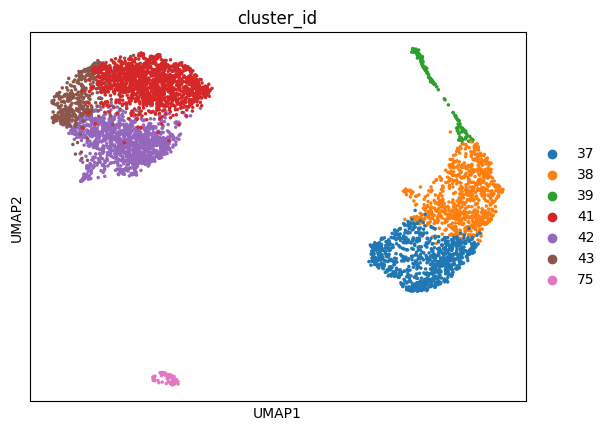

In [ ]:
'''
Código para plotear la UMAP con los clusters de los datos
usando el conjunto de datos .h5ad
'''

#hacer lo mismo con tsne
import anndata as ad
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.spatial import ConvexHull
import numpy as np
import scanpy as sc
from matplotlib.patches import Polygon

file_path = '/content/drive/MyDrive/CodigosAnalisisAlgoritmos/dataset.h5ad'
adata = ad.read_h5ad(file_path)

umap_cord = adata.obsm['X_UMAP']
clusterid = adata.obs['cluster_id']

print(umap_cord)
print(clusterid)

adata.obsm['X_umap'] = umap_cord

sc.pl.umap(adata, color='cluster_id')

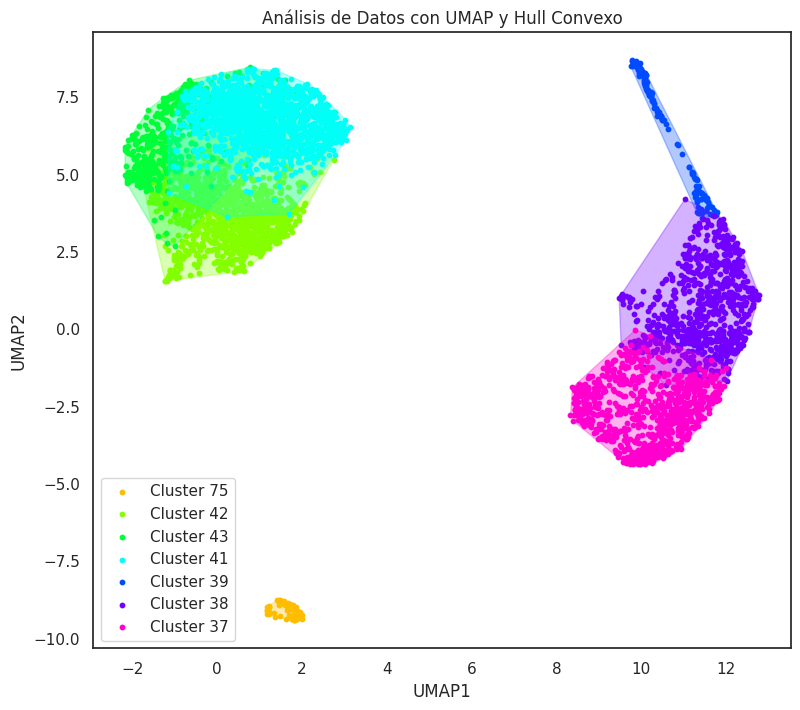

In [ ]:
'''
Código para plotear la UMAP con los clusters de los datos
usando el conjunto de datos .h5ad. Además, se plotea el convex hull
de cada cluster, se colorea según el cluster y se sobreponen poligonos
con el convex hull de cada cluster.
'''

#Librerias a utilizar
import anndata as ad
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.spatial import ConvexHull
import scanpy as sc

#Cargar datos
file_path = '/content/drive/MyDrive/CodigosAnalisisAlgoritmos/dataset.h5ad'
adata = ad.read_h5ad(file_path)

#Obtener coordenadas UMAP y etiquetas de los clusters
umap_cord = adata.obsm['X_UMAP']
clusterid = adata.obs['cluster_id']

#Configuración de colores para los clusters
sns.set(style="white")
palette = sns.color_palette('hsv', len(clusterid.unique()))

plt.figure(figsize=(9, 8))

#Calcular y plotear convex hull
for i, cluster in enumerate(clusterid.unique()):
    points = umap_cord[clusterid == cluster]

    if len(points) >= 3:
        hull = ConvexHull(points)
        hull_points = points[hull.vertices]

        #Graficar convex hull
        plt.fill(hull_points[:, 0], hull_points[:, 1], color=palette[i], alpha=0.3)

    #Graficar los puntos UMAP
    plt.scatter(points[:, 0], points[:, 1], color=palette[i], label=f'Cluster {cluster}', s=10)

#Título y etiquetas
plt.title('Análisis de Datos con UMAP y Hull Convexo')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.legend()
plt.show()
